# Tarea Semanal 2: Algoritmo para calcular la DFT

##### Florencia Alvarez
##### 167.262-9


Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

𝑋[𝑘]=∑ (desde 𝑛=0 hasta n= 𝑁−1) 𝑥[n].𝑒^(-j*2pi*k*n/N)


XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.

### Codigo de Python

Text(0, 0.5, '|X[k]|')

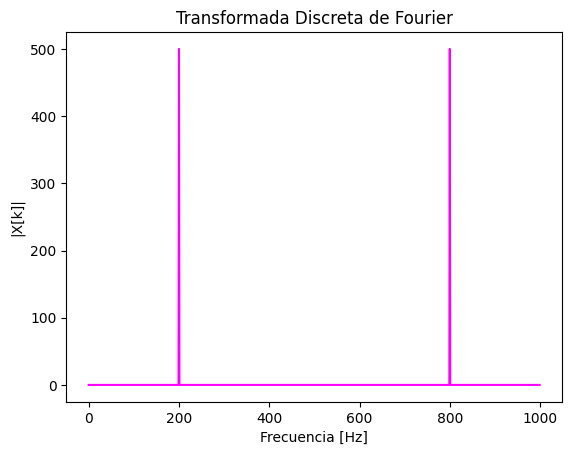

In [3]:
import numpy as np
import matplotlib.pyplot as plt


N= 1000#
fs= 1000 #Hz
fo = 1 #DeltaF

ts = 1/fs #s

def mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs):
    tt = np.arange(nn) * (1/fs)   # vector de tiempo    
    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc

    return tt, xx
   
def mi_funcion_DFT(xx):
    N=  len(xx)
    xx=np.array(xx).reshape(N, 1) #Vector columna
    n= np.arange(N).reshape(N, 1) #Armo un vector columna
    k= np.arange(N).reshape(1,N) #Armo un vector fila
    
    twiddle= np.exp(-1j*2*np.pi*n*k/N)
    
    #XX= np.dot(xx.reshape(1,N), twiddle)
    XX = np.dot(twiddle.T, xx) #El .T es para hacer la transpuesta
    return XX
    
# ts = 1/fs #s
tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 200, ph=0, nn = N, fs = fs)

XX = mi_funcion_DFT(xx)

f = np.arange(0, N) * fs / N 

plt.plot(f, np.abs(XX), color = 'fuchsia') 
plt.title('Transformada Discreta de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[k]|')


#### Fig. 1

Para realizar esta tarea, en primer lugar se guardó en la variable N la cantidad de muestras con las que se va a trabajar. Luego, se debió armar un vector fila utilizando los valores correspondientes a la funciòn recibida por mi_funcion_DFT, en este caso, una senoidal. A continuación, se armó un vector fila para el tiempo. Una vez realizado ello, se creó una matriz twiddle que será la encargada de hacer 𝑒^(-j*2pi*k*n/N).

Por último, para graficar, se utilizó la funciòn np.arange(-N/2, N/2) * fs / N  para poder graficar las frecuencias positivas y las negativas. Luego, con el comando fft.fftshift(XX) se puede centrar la señal para que quede en 200Hz y -200Hz. En el caso de no usar estas funciones, se podían observar las Deltas de Kronecker resultantes en 200 Hz y 800Hz

Una vez realizada esta primera prueba, se fueron probando senoidales de distintas frecuencias para poder así analizar su comportamiento.

Text(0, 0.5, '|X[k]|')

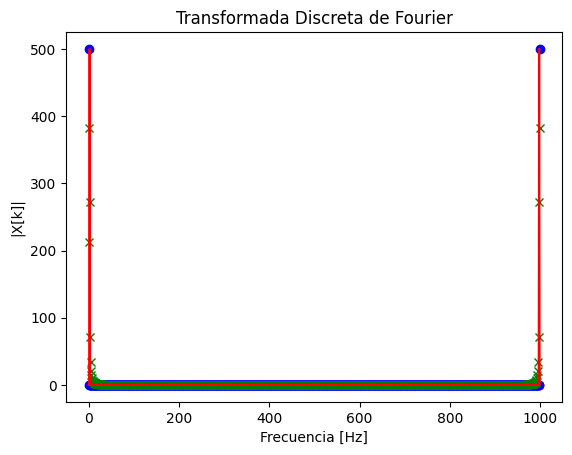

In [7]:
t2, xx2 = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)
tt2, xx3 = mi_funcion_sen( vmax = 1, dc = 0, ff = 1.5, ph=0, nn = N, fs = fs)
tt3, xx4 = mi_funcion_sen( vmax = 1, dc = 0, ff = 2, ph=0, nn = N, fs = fs)

XX2 = mi_funcion_DFT(xx2)
XX3 = mi_funcion_DFT(xx3)
XX4 = mi_funcion_DFT(xx4)

plt.plot(f, np.abs(XX2),'o', color = 'blue')
plt.plot(f, np.abs(XX3),'x', color = 'green')
plt.plot(f, np.abs(XX4), color = 'red')
plt.title('Transformada Discreta de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[k]|')

#### Fig. 2

Haciendo zoom sobre la región a analizar, podemos observar lo siguiente:

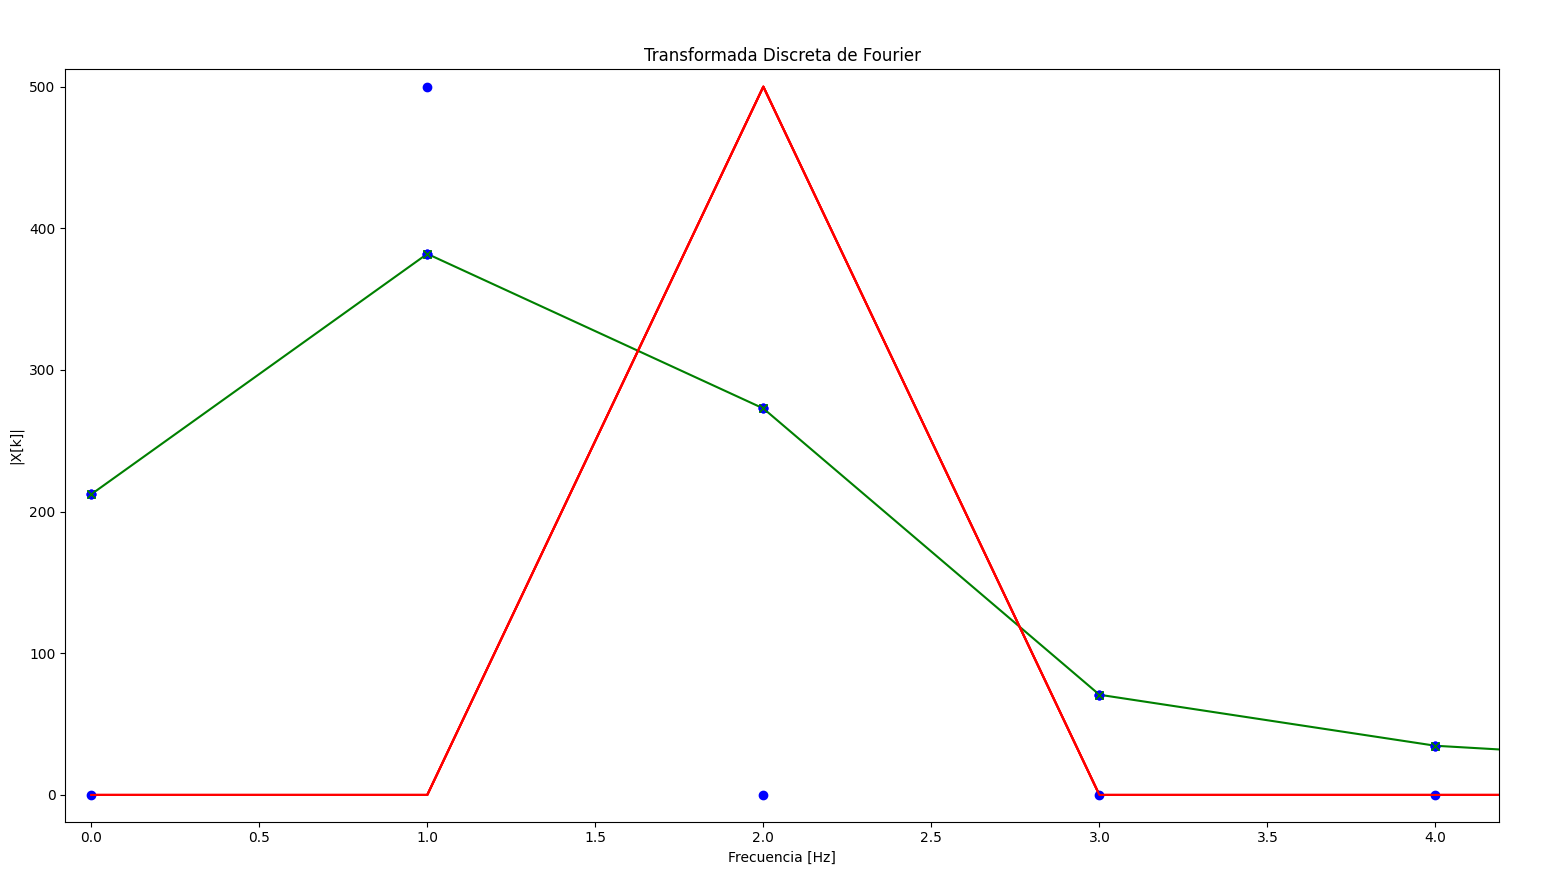

#### Fig. 3

Text(0, 0.5, '|X[k]|')

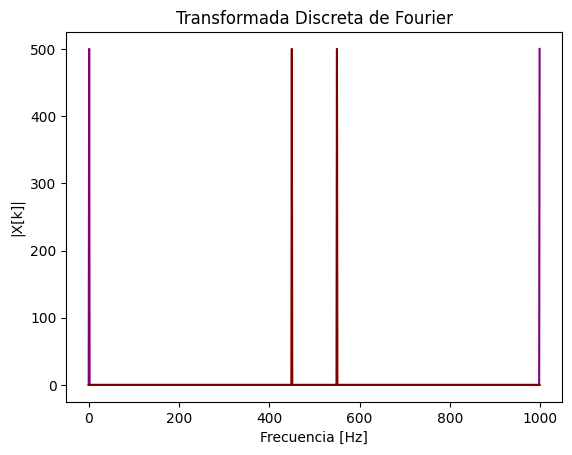

In [9]:
tt, xx5 = mi_funcion_sen( vmax = 1, dc = 0, ff = -1, ph=0, nn = N, fs = fs)
tt, xx6 = mi_funcion_sen( vmax = 1, dc = 0, ff = 450, ph=0, nn = N, fs = fs)

XX5 = mi_funcion_DFT(xx5)
XX6 = mi_funcion_DFT(xx6)

plt.plot(f, np.abs(XX5), color = 'purple')
plt.plot(f, np.abs(XX6), color = 'maroon')
plt.title('Transformada Discreta de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[k]|')

#### Fig. 4

Text(0, 0.5, '|X[k]|')

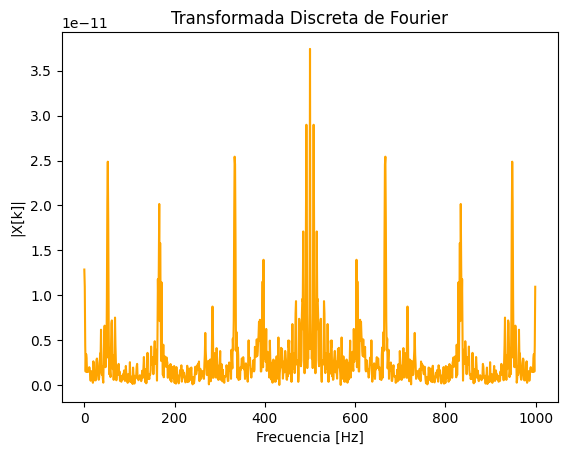

In [10]:
tt, xx7 = mi_funcion_sen( vmax = 1, dc = 0, ff = 500, ph=0, nn = N, fs = fs)

XX7 = mi_funcion_DFT(xx7)

plt.plot(f, np.abs(XX7), color = 'orange')
plt.title('Transformada Discreta de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[k]|')


#### Fig. 5

### Conclusiones

Se puede observar que al realizar la Transformada Discreta de Fourier (DFT) de una señal senoidal se puede apreciar una Delta de Dirac en el espectro de la frecuencia y que se presenta una simetría espectral.

Luego, comparando el comportomiento para f= 1[Hz], f= 1.5[Hz] y f= 2[Hz] (fig.3) se ṕuede observar que para el caso de f= 1.5[Hz] se produce un "desparramo" en frecuencia. Esto se debe a que no se presenta un numero de ciclos exacto, como sí ocurre en los otos dos casos.

Por último, en la fig. 5 se buscó estudiar lo  que ocurre en la frecuencia de Nyquist. Se puede observar que presenta un comportamiento diferente, "desparramándose" en el espectro de la frecuencia, produciendo aliasing.